## Image Processing with Python: Morphological Operations

In this section, we will clean, prepare and enhance images using morphological operations. This technique is especially useful in higher-level image processing applications such as image segmentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray
import cv2
import os
import pandas as pd

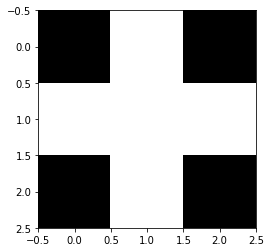

In [2]:
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(element, cmap='gray');

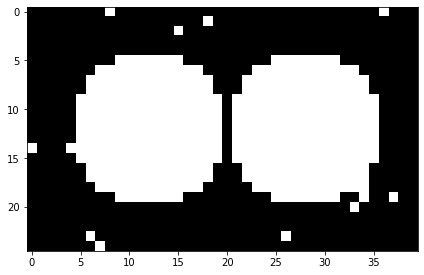

In [3]:
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range(20):
   circle_image[np.random.randint(25), np.random.randint(40)] = 1
imshow(circle_image);

Text(0.5, 1.0, 'Dilated Image')

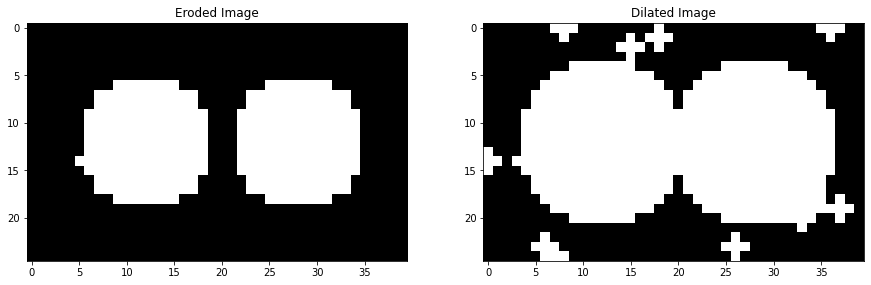

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(erosion(circle_image, element), cmap='gray');
ax[0].set_title('Eroded Image')
ax[1].imshow(dilation(circle_image, element), cmap='gray')
ax[1].set_title('Dilated Image')

Text(0.5, 1.0, 'Multi-Dilated Image')

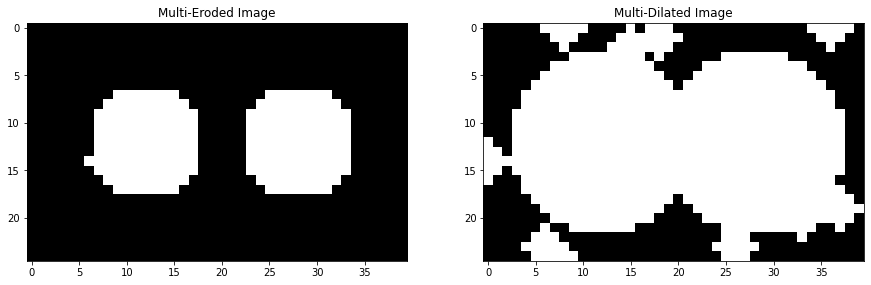

In [5]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(circle_image, 2, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(circle_image, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image')

Text(0.5, 1.0, 'Closed Image')

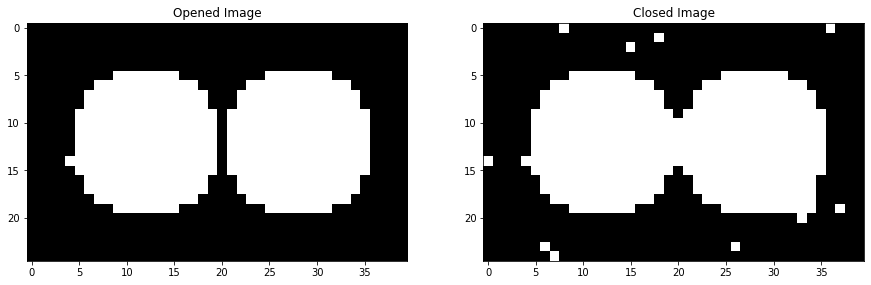

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(opening(circle_image, element), cmap='gray');
ax[0].set_title('Opened Image')
ax[1].imshow(closing(circle_image, element), cmap='gray')
ax[1].set_title('Closed Image')

### putting masks in a dataframe

In [55]:
masks = pd.DataFrame()
mask = []
for dirname, _, filenames in os.walk('testing images-masks'):
    for filename in filenames:
        mask.append(os.path.join(dirname, filename))
masks.insert(0, 'mask_path', mask)

In [56]:
masks

,mask_path
0,testing images-masks\1.PNG
1,testing images-masks\2.PNG
2,testing images-masks\3.PNG
3,testing images-masks\4.PNG
4,testing images-masks\5.PNG
5,testing images-masks\6.PNG


Text(0.5, 1.0, 'Original Image')

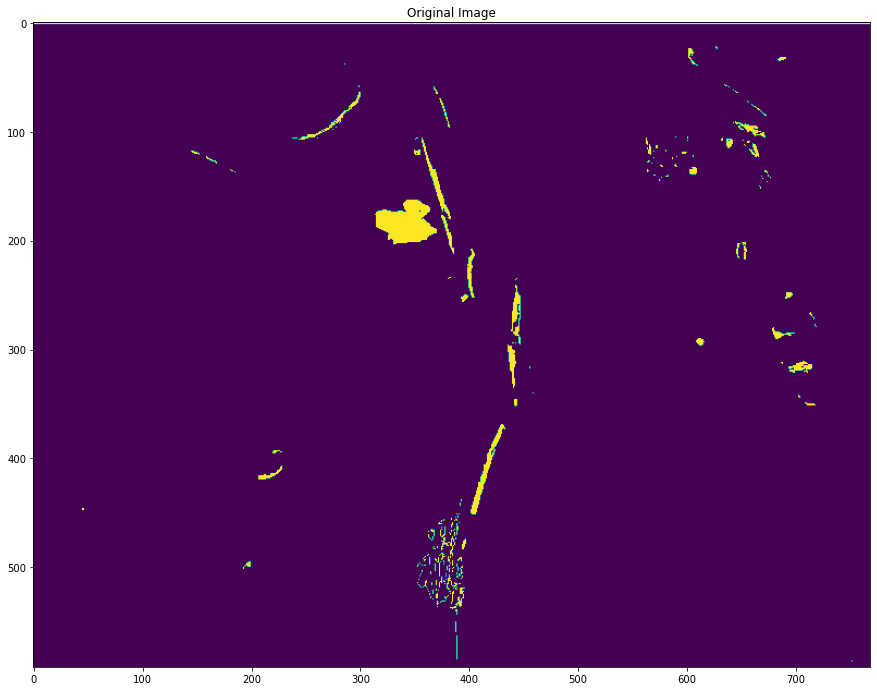

In [119]:
# path 
path = masks.iloc[5][0]              
  
# Reading an image 
image = cv2.imread(path, 0) 

plt.figure(figsize=(15,12))
plt.imshow(image);
plt.title('Original Image')


In [120]:
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])

In [121]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

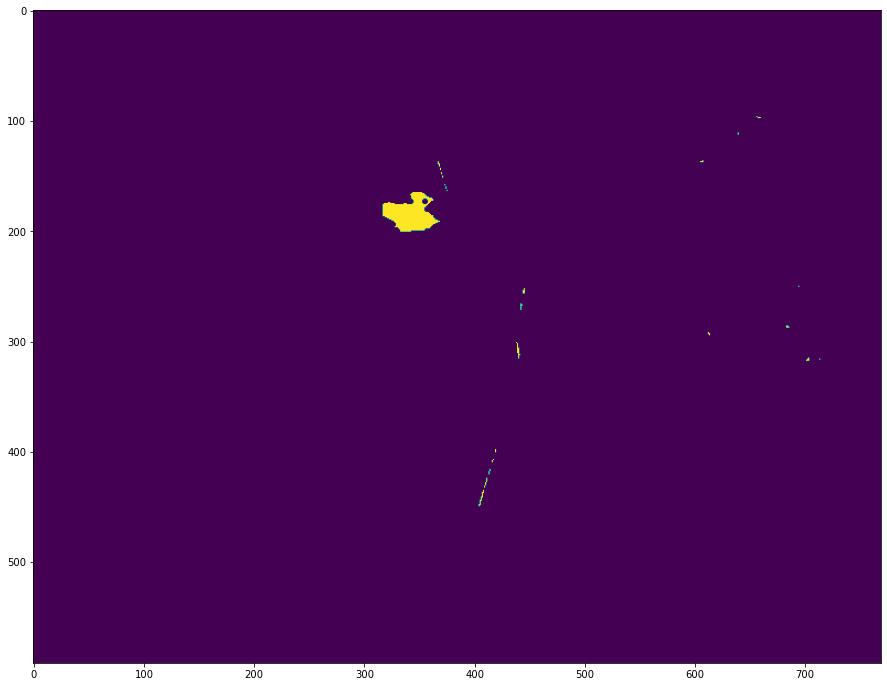

In [122]:
multi_eroded = multi_ero(image, 1, element)
plt.figure(figsize=(20,12))
plt.imshow(multi_eroded)

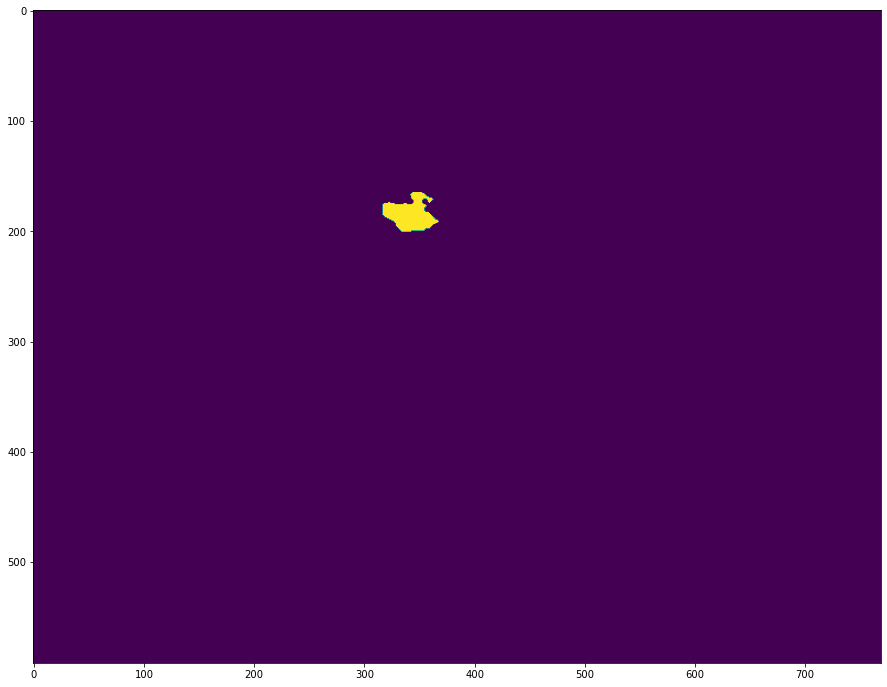

In [123]:
opened = opening(multi_eroded)
plt.figure(figsize=(20,12))
plt.imshow(opened)

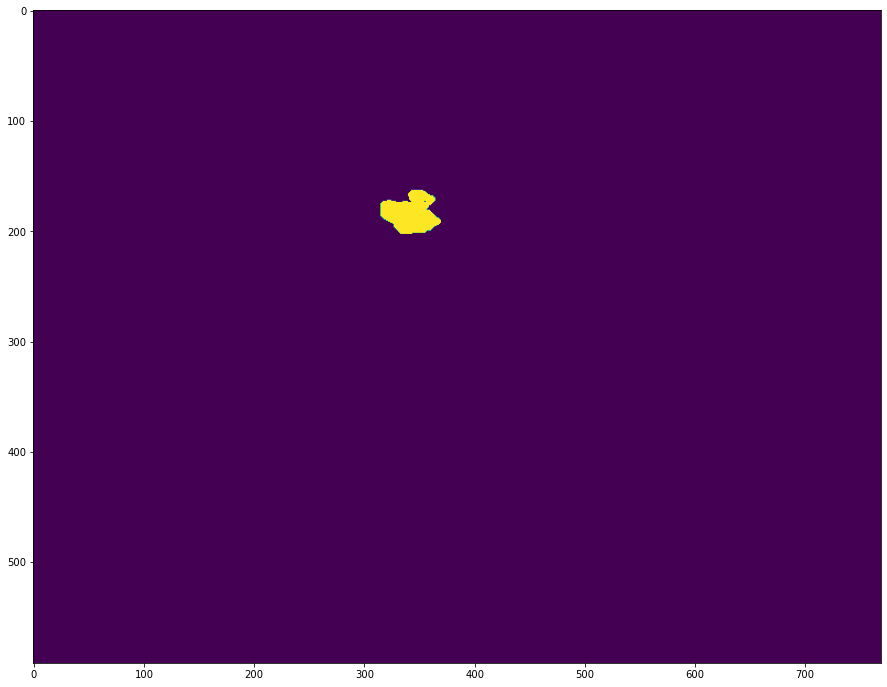

In [124]:
multi_diluted = multi_dil(opened, 1, element)
plt.figure(figsize=(20,12))
plt.imshow(multi_diluted)

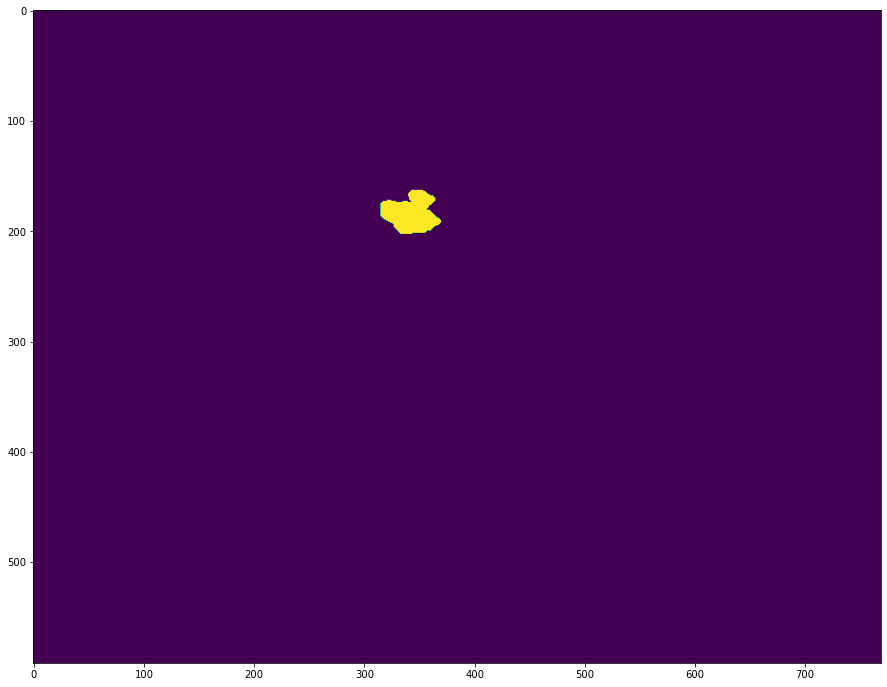

In [125]:
area_morphed = area_opening(area_closing(multi_diluted, 700), 700)
plt.figure(figsize=(20,12))
plt.imshow(area_morphed)

We can also use this resulting image as a mask for future image processing techniques, such as image segmentation.

In [126]:
path[21:-4]

'6'

In [127]:
folder = 'testing images-masks'
cv2.imwrite(os.path.join(folder, path[21:]), area_morphed)

True